In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import csv
import seaborn as sns
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from functools import reduce
from scipy.stats import pearsonr



//anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#read the file with the information from the game fifa_20
fifa20 = "fifa_transfermark_df.csv"
fifa20_df = pd.read_csv(fifa20, encoding='utf8')
fifa20_df
#sorting the 
#fifa20_df_value = fifa20_df.sort_values(by='value_eur', ascending=False).head(200)
# fifa20_df_value = fifa20_df.head(200)

,Name,long_name_y,age,club,overall,potential,value_eur,nationality,Image,Position,Market Value
0,Kylian Mbappé,Kylian Mbappé,20,Paris Saint-Germain,89,95,93500000,France,https://tmssl.akamaized.net//images/portrait/s...,Centre-Forward,228.0
1,Raheem Sterling,Raheem Sterling,24,Manchester City,88,90,73000000,England,https://tmssl.akamaized.net//images/portrait/s...,Left Winger,182.4
2,Neymar,Neymar da Silva Santos Junior,27,Paris Saint-Germain,92,92,105500000,Brazil,https://tmssl.akamaized.net//images/portrait/s...,Left Winger,182.4
3,Sadio Mané,Sadio Mané,27,Liverpool,88,88,62000000,Senegal,https://tmssl.akamaized.net//images/portrait/s...,Left Winger,171.0
4,Mohamed Salah,Mohamed Salah Ghaly,27,Liverpool,90,90,80500000,Egypt,https://tmssl.akamaized.net//images/portrait/s...,Right Winger,171.0
5,Harry Kane,Harry Kane,25,Tottenham Hotspur,89,91,83000000,England,https://tmssl.akamaized.net//images/portrait/s...,Centre-Forward,171.0
6,Kevin De Bruyne,Kevin De Bruyne,28,Manchester City,91,91,90000000,Belgium,https://tmssl.akamaized.net//images/portrait/s...,Attacking Midfield,171.0
7,Lionel Messi,Lionel Andrés Messi Cuccittini,32,FC Barcelona,94,94,95500000,Argentina,https://tmssl.akamaized.net//images/portrait/s...,Right Winger,159.6
8,Jadon Sancho,Jadon Sancho,19,Borussia Dortmund,84,92,44500000,England,https://tmssl.akamaized.net//images/portrait/s...,Right Winger,136.8
9,Antoine Griezmann,Antoine Griezmann,28,FC Barcelona,89,89,69000000,France,https://tmssl.akamaized.net//images/portrait/s...,Centre-Forward,136.8


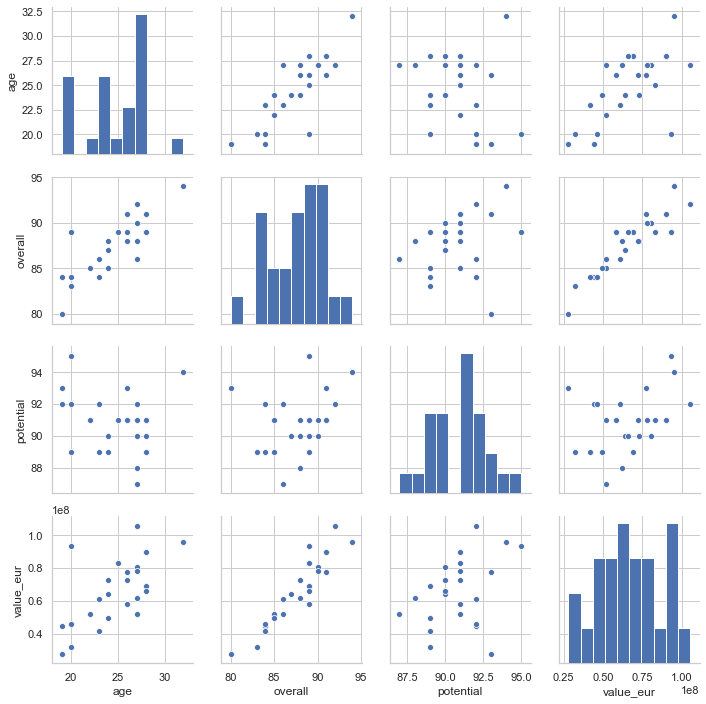

In [35]:

#Pairplot
sns.pairplot(fifa20_df.iloc[:,2:8])

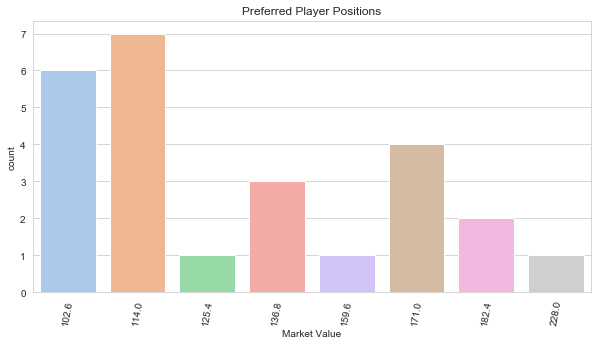

In [7]:
#Visualising all 'Position'.

plt.figure(figsize=(10,5))
plt.title("Preferred Player Positions")
sns.set_style('whitegrid')
plt.xticks(rotation=80)
sns.countplot(x='Market Value',data=fifa20_df, palette='pastel')

In [8]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

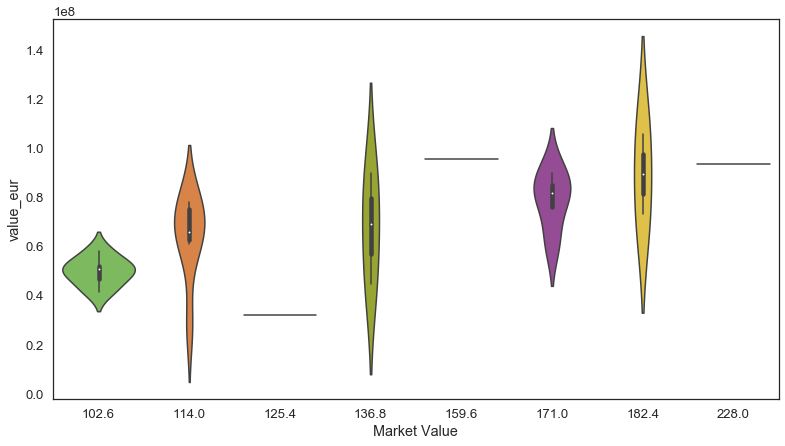

In [12]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(13,7))
sns.violinplot(x='Market Value', y='value_eur', data=fifa20_df.head(25), 
               palette=pkmn_type_colors) # Set color palette

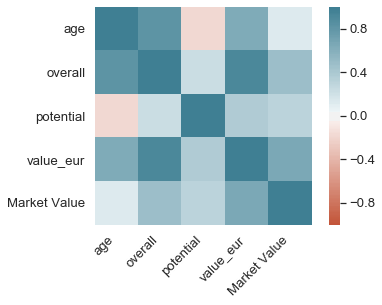

In [17]:
corr = fifa20_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 1, 'Potential vs Market Value')

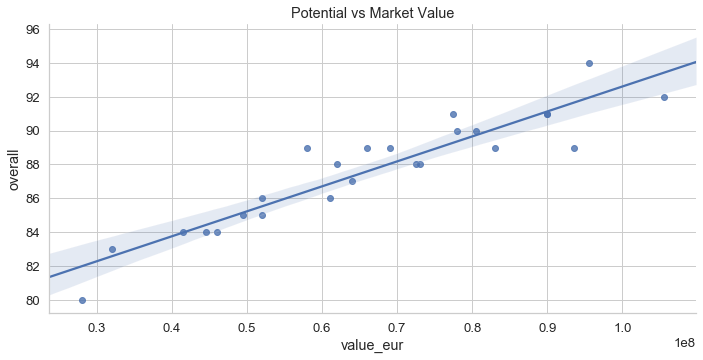

In [18]:
sns.set_style('whitegrid')

sns.lmplot(x='value_eur', y="overall", data=fifa20_df, 
           aspect=2)
plt.title("Potential vs Market Value Regression")

Text(0, 0.5, 'Market Value')

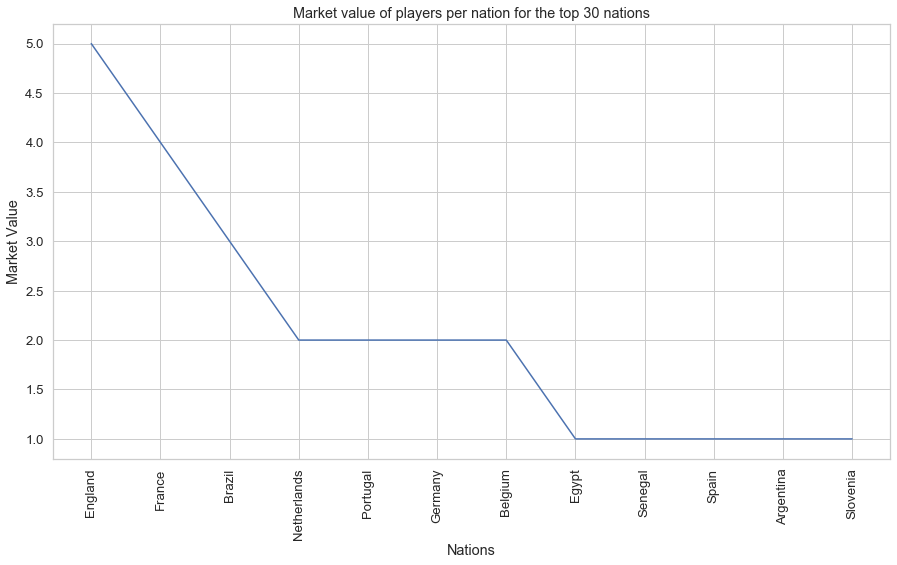

In [23]:
#Visualisation of the main 'nationalities'.

nat=pd.value_counts(fifa20_df['nationality'])
def f(t):
    return t * t
nat=nat.head(30)
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.title('Market value of players per nation for the top 30 nations')
plt.plot(nat)
plt.xticks(rotation=90)
plt.xlabel("Nations")
plt.ylabel('Market Value')

Text(0.5, 1.0, 'Average Rating by Nationality')

<Figure size 7200x7200 with 0 Axes>

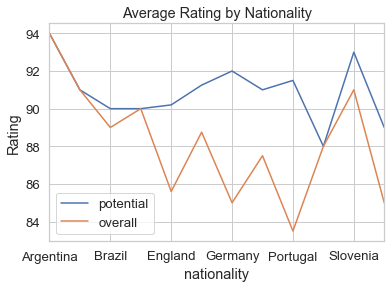

In [24]:
df_p = fifa20_df.head(25).groupby(['nationality'])['potential'].mean()
df_o = fifa20_df.head(25).groupby(['nationality'])['overall'].mean()

df_summary = pd.concat([df_p, df_o], axis=1)
plt.figure(figsize=(100,100))
ax = df_summary.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Nationality')

Text(0.5, 1.0, 'Potential for the top 25 clubs')

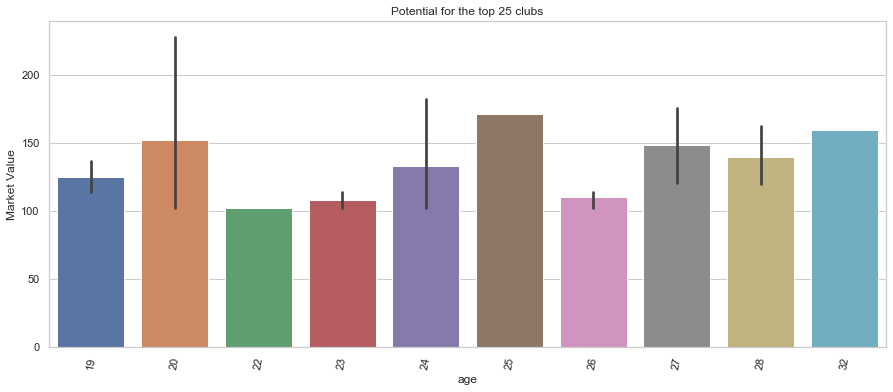

In [26]:

plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
plt.xticks(rotation=80)
sns.barplot(x='age', y='Market Value', data=fifa20_df).set_title(label="Potential for the top 25 clubs",)